In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix
import seaborn as sns

import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib
import glob
from google.colab import drive

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.style.use('default')

seed = 7
np.random.seed(seed)

drive.mount("/content/drive/")
path = "/content/drive/My Drive/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#2

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/NNDL/Project1/test.jpg"

img = load_img(path) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) 

datagen=[]
datagen.append((ImageDataGenerator(rotation_range=180),"Rotation with Range 180"))
datagen.append((ImageDataGenerator(width_shift_range=0.8),"width Shift with range 0.8"))
datagen.append((ImageDataGenerator(height_shift_range=0.8),"height Shift with range 0.8"))
datagen.append((ImageDataGenerator(horizontal_flip=True),"Horizontal Flip"))
datagen.append((ImageDataGenerator(vertical_flip=True),"Vertical Flip"))
datagen.append((ImageDataGenerator(vertical_flip=True,horizontal_flip=True),"Horizontal and Vertical Flip"))
datagen.append((ImageDataGenerator(brightness_range=[1,2]),"Brightness Range[1,2]"))
datagen.append((ImageDataGenerator(brightness_range=[0,1]),"Brightness Range[0,1]"))
datagen.append((ImageDataGenerator(zoom_range=2),"Zoom with range 2"))
datagen.append((ImageDataGenerator(rescale=1.9),"1.9 Scale"))
datagen.append((ImageDataGenerator(samplewise_center=True),"samplewise_center"))

for i in range(len(datagen)):
  plt.figure(figsize=(10,10))
  print("\n",datagen[i][1])
  it = datagen[i][0].flow(x, batch_size=1)
  for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    if i==4:
      plt.imshow(img)
    else:
      batch = it.next()
      image = batch[0].astype('uint8')
      plt.imshow(image)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#3

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

np.random.seed(70)
selected_index = np.array([])
for i in range(10):
  if i in [3,5]:
    temp = np.random.choice(np.where(y_train==i)[0],500)
  else:
    temp = np.where(y_train==i)[0]
  selected_index = np.append(selected_index,temp)
selected_index = selected_index.astype("int32")
selected_index = selected_index.tolist()

y_train = y_train[selected_index]
X_train = X_train[selected_index]

In [ ]:
y_true = y_test.copy()

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train Shape:\t",X_train.shape)
print("y_train Shape:\t",y_train.shape)
print("X_test Shape:\t",X_test.shape)
print("y_test Shape:\t",y_test.shape)

X_train Shape:	 (41000, 32, 32, 3)
y_train Shape:	 (41000, 10)
X_test Shape:	 (10000, 32, 32, 3)
y_test Shape:	 (10000, 10)


In [ ]:
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        test_acc.append(acc)
        test_loss.append(acc)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

def historyPlot(history,epochs):
  plt.figure(figsize=(10,5))
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.plot(range(1,epochs+1),history["accuracy"])
  plt.plot(range(1,epochs+1),history["val_accuracy"])
  plt.legend(['acc','val_acc'])
  plt.show()
  plt.figure(figsize=(10,5))
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.plot(range(1,epochs+1),history["loss"])
  plt.plot(range(1,epochs+1),history["val_loss"])
  plt.legend(['loss','val_loss'])
  plt.show()
  print('Testing Accuracy: %.2f%%, Loss: %.2f' % (history["val_accuracy"][-1]*100, history["val_loss"][-1]))

Epoch 1/20
641/641 [==============================] - 7s 9ms/step - loss: 1.7653 - accuracy: 0.3326 - val_loss: 1.5186 - val_accuracy: 0.4921
Epoch 2/20
641/641 [==============================] - 6s 9ms/step - loss: 1.0454 - accuracy: 0.6347 - val_loss: 1.3664 - val_accuracy: 0.5713
Epoch 3/20
641/641 [==============================] - 6s 9ms/step - loss: 0.8330 - accuracy: 0.7068 - val_loss: 1.1762 - val_accuracy: 0.6215
Epoch 4/20
641/641 [==============================] - 6s 9ms/step - loss: 0.7019 - accuracy: 0.7569 - val_loss: 1.1165 - val_accuracy: 0.6312
Epoch 5/20
641/641 [==============================] - 6s 9ms/step - loss: 0.6280 - accuracy: 0.7841 - val_loss: 0.9039 - val_accuracy: 0.6904
Epoch 6/20
641/641 [==============================] - 5s 9ms/step - loss: 0.5574 - accuracy: 0.8080 - val_loss: 0.9911 - val_accuracy: 0.6827
Epoch 7/20
641/641 [==============================] - 6s 9ms/step - loss: 0.5123 - accuracy: 0.8255 - val_loss: 0.9287 - val_accuracy: 0.7012
Epoch 

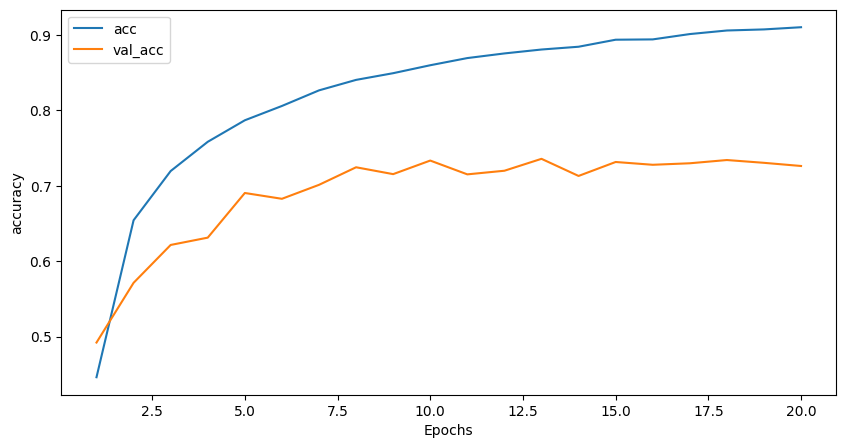

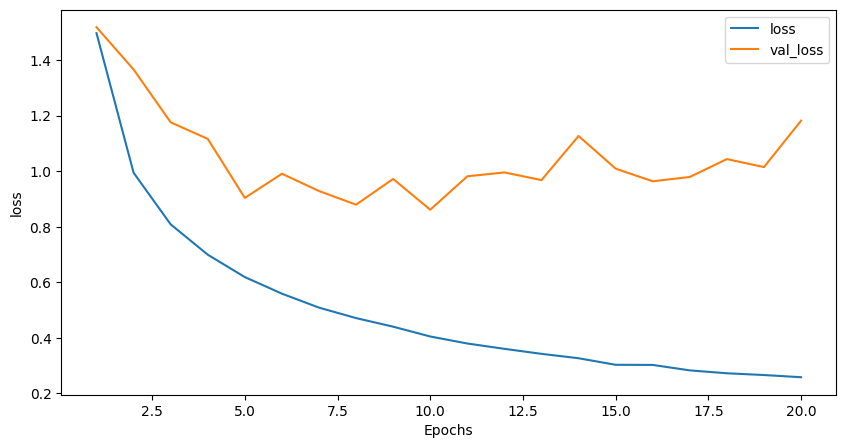

Testing Accuracy: 72.62%, Loss: 1.18
Train Time: 111.60 


In [ ]:
def dropOutModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=20
dropOutModel = dropOutModel()
start = time.time()
dropOutModelHistory = dropOutModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
dropOutModelTrainTime = end-start
historyPlot(dropOutModelHistory.history,epochs)
print('Train Time: %.2f ' % (dropOutModelTrainTime))

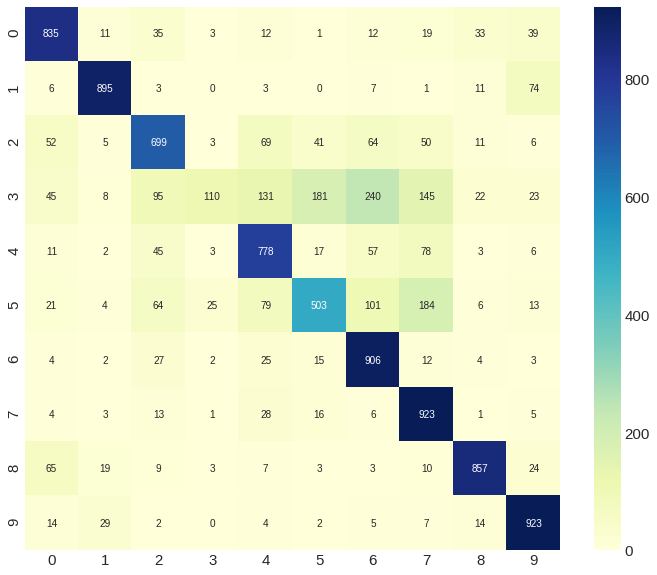

In [ ]:
y_pred_dropOutModel = pd.DataFrame(dropOutModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_dropOutModel),cmap="YlGnBu",annot=True,fmt="d")

#4

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

np.random.seed(70)
selected_index = np.array([])
for i in range(10):
  if i in [3,5]:
    temp = np.random.choice(np.where(y_train==i)[0],500)
  else:
    temp = np.where(y_train==i)[0]
  selected_index = np.append(selected_index,temp)
selected_index = selected_index.astype("int32")
selected_index = selected_index.tolist()

y_train = y_train[selected_index]
X_train = X_train[selected_index]


train_picks_c = np.where(y_train==3)[0]  
x_train_cat = X_train[train_picks_c]

train_picks_d = np.where(y_train==5)[0]  
x_train_dog = X_train[train_picks_d]

In [ ]:
class ListToMatrix:

    def __init__(self):
        self.data = []

    def update(self, row):
        for r in row:
            self.data.append(r)

    def finalize(self):
        return np.array(self.data)

def dataGenerator(x_train_category,datagen,array_list):
  datagen.fit(x_train_category)
  # Configure batch size and retrieve one batch of images
  i=1
  for X_batch in datagen.flow(x_train_category, batch_size=10):
      for j in range(10):
          array_list.update(X_batch[j].reshape(1,32, 32, 3))
      if i == 150:
        break
      i+=1

In [ ]:
# add Dog
array_list = ListToMatrix()

datagen = ImageDataGenerator(rotation_range=90)
dataGenerator(x_train_dog,datagen,array_list)

datagen = ImageDataGenerator(width_shift_range=0.4)
dataGenerator(x_train_dog,datagen,array_list)

datagen = ImageDataGenerator(zoom_range=0.6)
dataGenerator(x_train_dog,datagen,array_list)

cat_train = array_list.finalize()
X_train = np.append(X_train,cat_train,axis=0)

cat_y_train = np.full((4500,),5)
y_train = np.append(y_train,cat_y_train,axis=0)


In [ ]:
# add Cat
array_list = ListToMatrix()

datagen = ImageDataGenerator(rotation_range=90)
dataGenerator(x_train_cat,datagen,array_list)

datagen = ImageDataGenerator(width_shift_range=0.4)
dataGenerator(x_train_cat,datagen,array_list)

datagen = ImageDataGenerator(zoom_range=0.7)
dataGenerator(x_train_cat,datagen,array_list)

cat_train = array_list.finalize()
X_train = np.append(X_train,cat_train,axis=0)

cat_y_train = np.full((4500,),3)
y_train = np.append(y_train,cat_y_train,axis=0)


In [ ]:
y_true = y_test.copy()

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train Shape:\t",X_train.shape)
print("y_train Shape:\t",y_train.shape)
print("X_test Shape:\t",X_test.shape)
print("y_test Shape:\t",y_test.shape)

X_train Shape:	 (50000, 32, 32, 3)
y_train Shape:	 (50000, 10)
X_test Shape:	 (10000, 32, 32, 3)
y_test Shape:	 (10000, 10)


Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.8706 - accuracy: 0.2983 - val_loss: 1.2871 - val_accuracy: 0.5290
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.1193 - accuracy: 0.5912 - val_loss: 1.0240 - val_accuracy: 0.6396
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.8803 - accuracy: 0.6812 - val_loss: 0.9661 - val_accuracy: 0.6765
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.7622 - accuracy: 0.7217 - val_loss: 0.8975 - val_accuracy: 0.6902
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 0.6734 - accuracy: 0.7545 - val_loss: 0.9304 - val_accuracy: 0.7051
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 0.6058 - accuracy: 0.7811 - val_loss: 0.7948 - val_accuracy: 0.7380
Epoch 7/20
782/782 [==============================] - 7s 8ms/step - loss: 0.5449 - accuracy: 0.8041 - val_loss: 0.8755 - val_accuracy: 0.7275
Epoch 

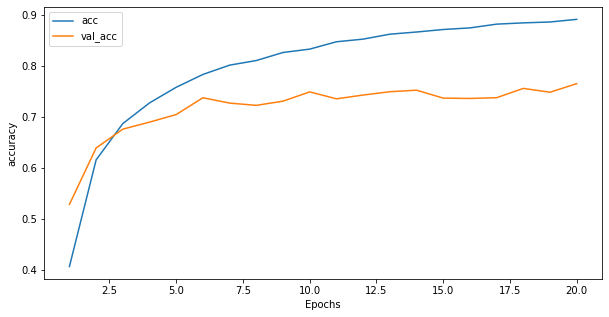

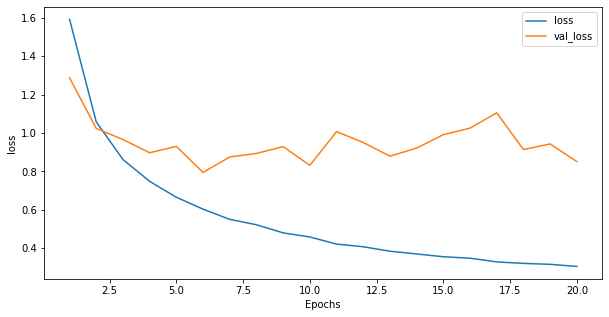

Testing Accuracy: 76.56%, Loss: 0.85
Train Time: 133.66 


In [ ]:
epochs=20
dropOutModel = dropOutModel()
start = time.time()
dropOutModelHistory = dropOutModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
dropOutModelTrainTime = end-start
historyPlot(dropOutModelHistory.history,epochs)
print('Train Time: %.2f ' % (dropOutModelTrainTime))

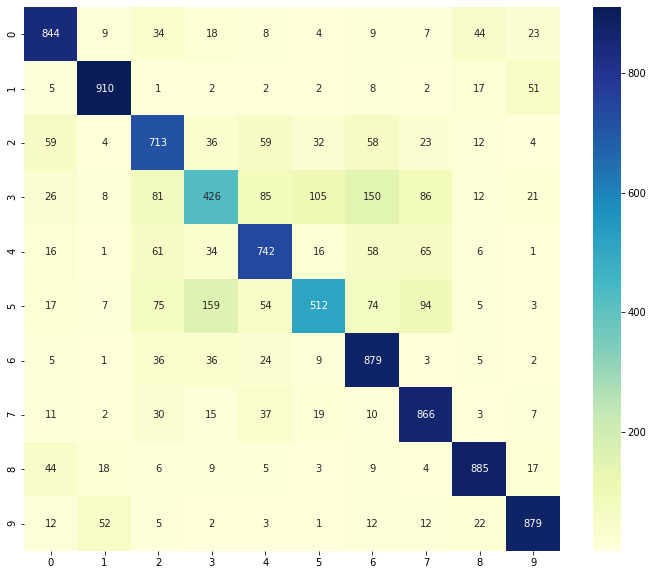

In [ ]:
results.append({
    "model_name" : "dropOutModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (dropOutModelTrainTime)),
    "accuracy" : dropOutModelHistory.history["accuracy"][-1],
    "val_accuracy": dropOutModelHistory.history["val_accuracy"][-1],
    "loss":dropOutModelHistory.history["loss"][-1],
    "val_loss":dropOutModelHistory.history["val_loss"][-1],
    "epochs" : "50",
})
y_pred_dropOutModel = pd.DataFrame(dropOutModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_dropOutModel),cmap="YlGnBu",annot=True,fmt="d")